# Predicting the Odds of Surviving the Titanic Disaster

## Data Understanding
The data is acquired from Kaggle's "Titanic: Machine Learning from Disaster"

#### VARIABLE DESCRIPTIONS:

survived:        Survival
                (0 = No; 1 = Yes)
                
pclass:          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
                
name:            Name

sex:             Sex

age:             Age

sibsp:           Number of Siblings/Spouses Aboard

parch:           Number of Parents/Children Aboard

ticket:          Ticket Number

fare:            Passenger Fare

cabin:           Cabin

embarked:        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

##### SPECIAL NOTES:

Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower


Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. SibSp and Parch)
some relations were ignored.  The following are the definitions used
for SibSp and Parch.

* Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
* Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
* Parent:   Mother or Father of Passenger Aboard Titanic
* Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

## Read the CSV files into DataFrames

In [2]:
# import dependencies
import numpy as np
import pandas as pd
import seaborn as sns


# load in the training dataset and inspect
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# check the shape
train_df.shape

(891, 12)

In [4]:
# read in the test dataset and inspect
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# check the shape
test_df.shape

(418, 11)

## Prepare the Data
First, we need to look into our data and determine which columns to keep and clean up the missing values.

In [6]:
concat_df = pd.concat([train_df, test_df], ignore_index=True)
y = train_df['Survived']

C:\Users\Carolyn Reyes\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [7]:
len(y)

891

In [8]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### Find extent of missing data

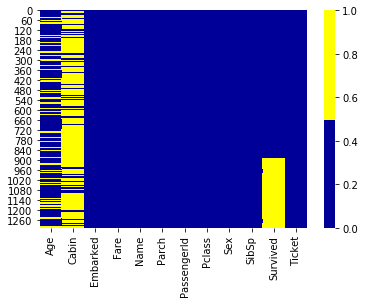

In [9]:
cols = concat_df.columns[:12] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(concat_df[cols].isnull(), cmap=sns.color_palette(colours))

In [10]:
women = concat_df.loc[concat_df.Sex == 'female']
women_survived = concat_df.loc[(concat_df.Sex == 'female') & (concat_df.Survived == 1), :]
rate_women = len(women_survived)/len(women)

print("% of women who survived:", round(rate_women, 2))

% of women who survived: 0.5


In [11]:
men = concat_df.loc[concat_df.Sex == 'male']
men_survived = concat_df.loc[(concat_df.Sex == 'male') & (concat_df.Survived == 1), :]
rate_men = len(men_survived)/len(men)

print("% of men who survived:", round(rate_men, 2))

% of men who survived: 0.13


In [12]:
# Drop the unnecessary columns: Ticket (Number), Cabin, and Survived (as this is the dependent variable to be predicted)
concat_df.drop(['Ticket', 'Cabin', 'Survived'], axis = 1, inplace = True)

In [13]:
# If it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in concat_df.columns:
    pct_missing = np.mean(concat_df[col].isnull())
    print('{} - {}% missing'.format(col, round(pct_missing*100, 2)))

Age - 20.09% missing
Embarked - 0.15% missing
Fare - 0.08% missing
Name - 0.0% missing
Parch - 0.0% missing
PassengerId - 0.0% missing
Pclass - 0.0% missing
Sex - 0.0% missing
SibSp - 0.0% missing


In [14]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
Age            1046 non-null float64
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 92.1+ KB


From the info above, it appears that "Age", "Cabin", and "Embarked" are missing values out of the total 891 entries. The "Cabin" column will be dropped since it does not have a significant sample size to produce any reliable results. The missing values in the "Age" column will be replaced with the average age to their respective sex and the missing values in the "Embarked" column will be replaced with the port which corresponds with the appropriate "Fare" price. The "Ticket" column will also be removed as the value of the ticket is already defined within the "Fare" column as well as the "Name" and "PassengerId" columns since they provide no significant value to make our prediction.

In [15]:
# Find the missing Embarked values
concat_df[concat_df['Embarked'].isnull()].head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp
61,38.0,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0
829,62.0,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0


In [16]:
# Find the counts of each unique value in the Embarked column for passengers who paid a fare of $80 or more
concat_df[(concat_df['Fare'] >= 80)]['Embarked'].value_counts()

C    62
S    50
Q     3
Name: Embarked, dtype: int64

Replace the null values of "Embarked" with C since the majority of people who paid a fare of \$80 or more embarked from C.

In [17]:
concat_df['Embarked'] = concat_df['Embarked'].fillna('C')

In [18]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
Age            1046 non-null float64
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 92.1+ KB


In [19]:
# Find the missing Age values
concat_df[concat_df['Age'].isnull()].head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp
5,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0
17,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0
19,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0
26,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,male,0
28,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,0


In [20]:
# Get average Age by Sex
avg_age = concat_df.groupby('Sex')['Age'].mean()
print(avg_age)

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64


In [21]:
# Assign gender average age to variables
avg_age_female = avg_age[0]
avg_age_male = avg_age[1]

In [22]:
# Replace null values of ages in respect to average age of males and females for training set
concat_df['Age'] = concat_df['Age'].replace(concat_df[(concat_df['Sex'] == 'male') & (concat_df['Age'].isnull())]['Age'], avg_age_male)
concat_df['Age'] = concat_df['Age'].replace(concat_df[(concat_df['Sex'] == 'female') & (concat_df['Age'].isnull())]['Age'], avg_age_female)

In [23]:
concat_df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0


In [24]:
# check the data frame to make sure all entries are filled in
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
Age            1309 non-null float64
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 92.1+ KB


In [25]:
concat_df[concat_df['Fare'].isnull()]

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp
1043,60.5,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0


Since he is in Pclass 3, we will replace his missing Fare value with the average 3rd class fare price.

In [26]:
concat_df.groupby('Pclass')['Fare'].mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [27]:
avg_fare = concat_df.groupby('Pclass')['Fare'].mean()
concat_df['Fare'] = concat_df['Fare'].fillna(avg_fare[3])

Pclass is an ordinal variable, which means it is a categorical variable with order. Pclass 1 > Pclass 2 > Pclass 3. We will need to reverse this order to make our model understand this hierarchy.

In [28]:
concat_df['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [29]:
concat_df['Pclass'] = concat_df['Pclass'].map(lambda x: 3 if x == 1 else (1 if x == 3 else x)) # reverse the hierarchy for Pclass

In [30]:
concat_df['Pclass'].value_counts()

1    709
3    323
2    277
Name: Pclass, dtype: int64

In [31]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
Age            1309 non-null float64
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 92.1+ KB


It looks like those with family have a higher chance of survival.  We will add a column to indicate that.

In [32]:
concat_df['Family'] = concat_df['SibSp'] + concat_df['Parch']

Children and Women seem to have a higher survival rate than Males, we will create a feature to give preference

In [33]:
concat_df['ageclass'] = concat_df['Sex'].map(lambda x: 0 if x == 'male' else 1) # assign male to have lowest weight and female to have highest weight

In [34]:
# assign value of 1 for children
for i in range(len(concat_df)):
    if concat_df['Age'][i] < 16:
        concat_df['ageclass'][i] = 1

C:\Users\Carolyn Reyes\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [37]:
concat_df.groupby(['Sex', 'ageclass'])['Age'].value_counts()

Sex     ageclass  Age      
female  1         28.687088    78
                  22.000000    22
                  24.000000    21
                  18.000000    20
                  30.000000    17
                  45.000000    13
                  29.000000    12
                  36.000000    12
                  35.000000    11
                  19.000000    10
                  21.000000    10
                  23.000000    10
                  27.000000    10
                  31.000000    10
                  26.000000     9
                  28.000000     9
                  33.000000     9
                  16.000000     8
                  17.000000     8
                  39.000000     8
                  48.000000     8
                  2.000000      7
                  38.000000     7
                  20.000000     6
                  25.000000     6
                  40.000000     6
                  50.000000     6
                  1.000000      5
                  4.

In [38]:
concat_df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Family,ageclass
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,1,male,1,1,0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,3,female,1,1,1
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,1,female,0,0,1
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,3,female,1,1,1
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,1,male,0,0,0


In [45]:
concat_df.count()

Age            1309
Embarked       1309
Fare           1309
Name           1309
Parch          1309
PassengerId    1309
Pclass         1309
Sex            1309
SibSp          1309
Family         1309
ageclass       1309
dtype: int64

In [46]:
# The Parch and SibSp columns can be deleted as we have combined them in the Family column
#concat_df.drop(['Parch', 'SibSp'], axis = 1, inplace = True)

# Divide data for training and test
train_df = concat_df.loc[:890, :]
test_df = concat_df.loc[891:, :]

# Add Survived column to the training data
train_df = train_df.join(y)

In [48]:
# Check data
test_df.count()
#test_df.head()

Age            418
Embarked       418
Fare           418
Name           418
Parch          418
PassengerId    418
Pclass         418
Sex            418
SibSp          418
Family         418
ageclass       418
dtype: int64

C:\Users\Carolyn Reyes\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Carolyn Reyes\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


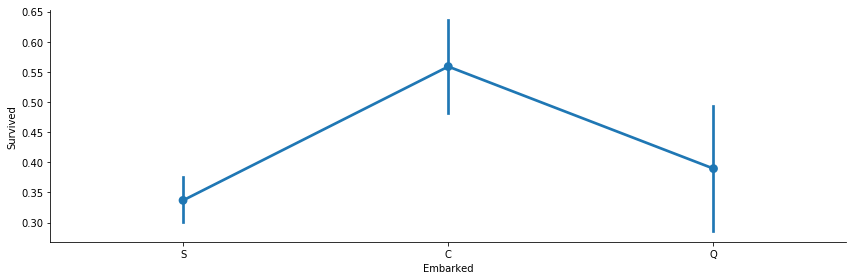

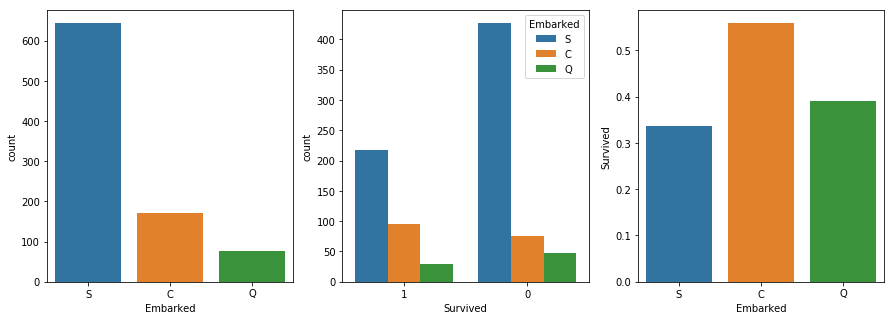

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline
# Embarked


# plot
sns.factorplot('Embarked','Survived', data=train_df,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

#sns.factorplot('Embarked',data=df_train,kind='count',order=['S','C','Q'],ax=axis1)
#sns.factorplot('Survived',hue="Embarked",data=titanic_df,kind='count',order=[1,0],ax=axis2)
sns.countplot(x='Embarked', data=train_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=train_df, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = train_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

# Either to consider Embarked column in predictions,
# and remove "S" dummy variable, 
# and leave "C" & "Q", since they seem to have a good rate for Survival.

# OR, don't create dummy variables for Embarked column, just drop it, 
# because logically, Embarked doesn't seem to be useful in prediction.

In [50]:
train_df['Embarked'] = train_df['Embarked'].map(lambda x: 2 if x == 'C' else (1 if x == 'Q' else 0)) # convert Embarked to have weight
test_df['Embarked'] = test_df['Embarked'].map(lambda x: 2 if x == 'C' else (1 if x == 'Q' else 0)) # convert Embarked to have weight

C:\Users\Carolyn Reyes\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


C:\Users\Carolyn Reyes\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Carolyn Reyes\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


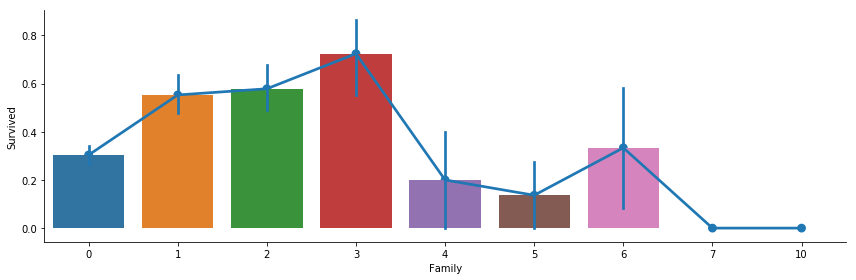

In [51]:
sns.factorplot('Family','Survived', data=train_df,size=4,aspect=3)

familysur = train_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=familysur)

It appears you would have a higher chance of survival (more than 50%) if you had a family size between 1 and 3. We will create a feature to reflect this.

In [56]:
test_df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Family,ageclass
891,34.5,1,7.8292,"Kelly, Mr. James",0,892,1,male,0,1,0
892,47.0,0,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,1,female,1,2,1
893,62.0,1,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,1,0
894,27.0,0,8.6625,"Wirz, Mr. Albert",0,895,1,male,0,1,0
895,22.0,0,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,1,female,1,2,1


In [55]:
# change family feature into weight values
train_df['Family'] = train_df['Family'].map(lambda x: 2 if (x >= 1 and x <= 3) else (1 if x == 0 or x == 6 else 0))
test_df['Family'] = test_df['Family'].map(lambda x: 2 if (x >= 1 and x <= 3) else (1 if x == 0 or x == 6 else 0))


C:\Users\Carolyn Reyes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Now that our data has been cleaned, we need to make our categorical variables into dummy variables.

In [57]:
# Convert male/female labels to binary
train_df["Sex"] = train_df["Sex"].map(lambda x: 1 if x == "male" else 0)
test_df["Sex"] = test_df["Sex"].map(lambda x: 1 if x == "male" else 0)

C:\Users\Carolyn Reyes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
# Half of the people who survived were under 30 years of age, lets make a feature to account for this
bins = [0.000, 30.000, 100.000]
labels = [0, 1]

train_df["age_group"] = pd.cut(train_df["Age"], bins=bins, labels=labels).astype(np.int64)
test_df["age_group"] = pd.cut(test_df["Age"], bins=bins, labels=labels).astype(np.int64)

C:\Users\Carolyn Reyes\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [59]:
train_df.head(10)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Family,ageclass,Survived,age_group
0,22.000000,0,7.2500,"Braund, Mr. Owen Harris",0,1,1,1,1,2,0,0,0
1,38.000000,2,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,3,0,1,2,1,1,1
2,26.000000,0,7.9250,"Heikkinen, Miss. Laina",0,3,1,0,0,1,1,1,0
3,35.000000,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,3,0,1,2,1,1,1
4,35.000000,0,8.0500,"Allen, Mr. William Henry",0,5,1,1,0,1,0,0,1
5,30.585228,1,8.4583,"Moran, Mr. James",0,6,1,1,0,1,0,0,1
6,54.000000,0,51.8625,"McCarthy, Mr. Timothy J",0,7,3,1,0,1,0,0,1
7,2.000000,0,21.0750,"Palsson, Master. Gosta Leonard",1,8,1,1,3,0,1,0,0
8,27.000000,0,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,1,0,0,2,1,1,0
9,14.000000,2,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,0,1,2,1,1,0


In [60]:
train_df.groupby(["Survived", "age_group"]).count()

Age  Embarked  Fare  Name  Parch  PassengerId  Pclass  \
Survived age_group                                                          
0        0          260       260   260   260    260          260     260   
         1          289       289   289   289    289          289     289   
1        0          202       202   202   202    202          202     202   
         1          140       140   140   140    140          140     140   

                    Sex  SibSp  Family  ageclass  
Survived age_group                                
0        0          260    260     260       260  
         1          289    289     289       289  
1        0          202    202     202       202  
         1          140    140     140       140

In [441]:
# split independent and dependent variables for training
X = train_df.drop(["Survived", "Name", "PassengerId"], axis=1)
y = train_df["Survived"]

In [442]:
#del X, y, X_train, y_train, X_test, y_test

In [443]:
# Split the data into 70% Training Data and 30% Testing Data with seed(0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Modeling
There are a few classification algorithms available to use to make our model. First we need to select our algorithm, fit the data, and make predictions using the test dataset. 

### Logistic Regression

In [444]:
from sklearn.linear_model import LogisticRegression

# Define your model
logReg = LogisticRegression()


In [445]:
# Train your model by fitting it to the data
logReg.fit(X_train, y_train)

C:\Users\Carolyn Reyes\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [446]:
logReg_pred = logReg.predict(X_test)

In [447]:
# Evaluate our model and get the accuracy score
logReg.score(X_test, y_test) * 100

80.59701492537313

In [448]:
# Get the confusion matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, logReg_pred).ravel()

In [449]:
(tn, fp, fn, tp)

(135, 22, 30, 81)

In [319]:
y_pred_df = pd.DataFrame(data=y_pred, columns=['Pred'])
y_test_df = pd.DataFrame(data=y_test_arr, columns=['Test'])

In [452]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 709 to 430
Data columns (total 10 columns):
Age          268 non-null float64
Embarked     268 non-null int64
Fare         268 non-null float64
Parch        268 non-null int64
Pclass       268 non-null int64
Sex          268 non-null int64
SibSp        268 non-null int64
Family       268 non-null int64
ageclass     268 non-null int64
age_group    268 non-null int64
dtypes: float64(2), int64(8)
memory usage: 23.0 KB


In [453]:
result = pd.concat([y_test_df, y_pred_df], axis=1)
result

,Test,Pred
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1
5,1,1
6,1,1
7,0,0
8,1,1
9,1,1


### Ensemble Method

In [454]:
from sklearn.ensemble import RandomForestClassifier

In [459]:
#features = ["Pclass", "Sex", "SibSp", "Parch"]
features = ["ageclass", "Pclass", "Sex", "Family"]
#X_train = pd.get_dummies(train_df[features])
#X_test = pd.get_dummies(test_df[features])

# Define model
rfc = RandomForestClassifier(n_estimators=800, max_depth=5, random_state=1)

# Train model by fitting it to the data
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

#output = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': rfc_pred})
#output.head()


In [460]:
# Evaluate the RFC model and get the accuracy score
rfc.score(X_test, y_test)

0.8171641791044776

In [461]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, rfc_pred).ravel()
tn, fp, fn, tp

(143, 14, 35, 76)

### KNeighbors Classifier

In [462]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_squared_error

In [463]:
# define the model
kNN = KNeighborsClassifier(n_neighbors=7)

kNN.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [464]:
y_knn_pred = kNN.predict(X_test)
y_knn_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [465]:
print("The KNeighbors Classifer accuracy on the testing set is:", kNN.score(X_test, y_test) * 100)

The KNeighbors Classifer accuracy on the testing set is: 72.38805970149254


In [466]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_knn_pred).ravel()
tn, fp, fn, tp

(134, 23, 51, 60)

### Gradient Boosting

In [467]:
from sklearn.ensemble import GradientBoostingClassifier

In [468]:
gb = GradientBoostingClassifier(n_estimators=80)

In [469]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [470]:
gb.score(X_train, y_train)

0.9101123595505618

In [471]:
gb.score(X_test, y_test)

0.8171641791044776

In [472]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 709 to 430
Data columns (total 10 columns):
Age          268 non-null float64
Embarked     268 non-null int64
Fare         268 non-null float64
Parch        268 non-null int64
Pclass       268 non-null int64
Sex          268 non-null int64
SibSp        268 non-null int64
Family       268 non-null int64
ageclass     268 non-null int64
age_group    268 non-null int64
dtypes: float64(2), int64(8)
memory usage: 23.0 KB


In [473]:
gb.feature_importances_

# Age, Embarked, Fare, Parch, Pclass
# Sex, SipSp, Family, ageclass, age_group

array([0.07344539, 0.01979207, 0.18875631, 0.0042134 , 0.18418521,
       0.00266608, 0.00557288, 0.05379395, 0.46757471, 0.        ])

[0.07344539 0.01979207 0.18875631 0.0042134  0.18418521 0.00266608
 0.00557288 0.05379395 0.46757471 0.        ]
[ 15.70773354   4.23292036  40.36923078   0.901118    39.39160975
   0.57019367   1.19186923  11.50488896 100.           0.        ]
[9 5 3 6 1 7 0 4 2 8]
[0 1 2 3 4 5 6 7 8 9]


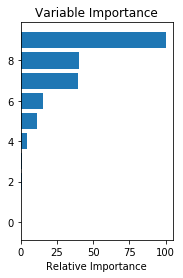

In [474]:
import matplotlib.pyplot as plt

# Plot feature importance
feature_importance = gb.feature_importances_
print(feature_importance)
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
print(feature_importance)
sorted_idx = np.argsort(feature_importance)
print(sorted_idx)
pos = np.arange(sorted_idx.shape[0])
print(pos)
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
#plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
